<a href="https://colab.research.google.com/github/marcusvbastos/recomenda-o-por-imagens/blob/main/recomenda%C3%A7%C3%A3o_por_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total de imagens encontradas: 3670
Imagem de consulta escolhida: flower_photos/roses/410425647_4586667858.jpg


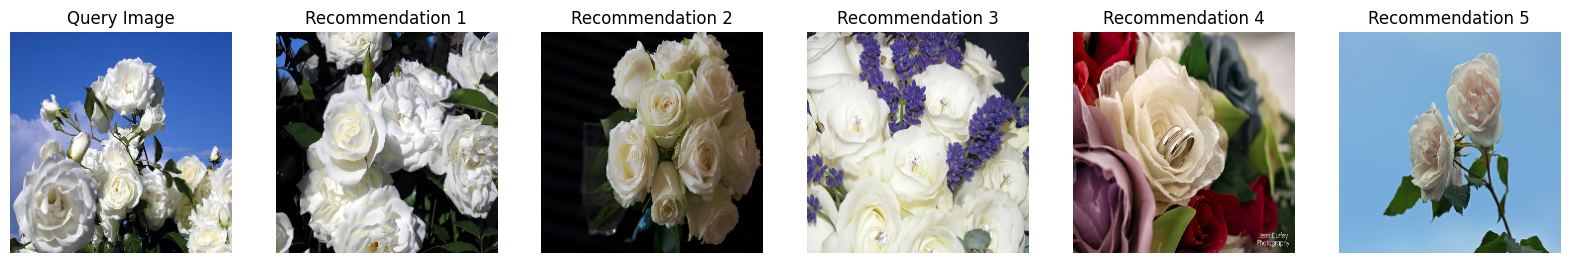

In [8]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import os
import random

# Carregar o modelo pré-treinado
model = hub.load('https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4')

# Função para processar imagem
def process_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (224, 224))
    img = tf.cast(img, tf.float32) / 255.0
    return img

# Gerar vetores de características para todas as imagens
image_paths = []
for root, dirs, files in os.walk("flower_photos"):
    for file in files:
        if file.endswith(".jpg"):
            image_paths.append(os.path.join(root, file))

feature_vectors = []

print(f"Total de imagens encontradas: {len(image_paths)}")

for path in image_paths:
    img = process_image(path)
    features = model(img[tf.newaxis, ...])
    feature_vectors.append(features[0])

feature_vectors = np.array(feature_vectors)

# Criar índice de vizinhos mais próximos
nn = NearestNeighbors(n_neighbors=6, metric='cosine')
nn.fit(feature_vectors)

# Função para obter recomendações
def get_recommendations(image_path):
    img = process_image(image_path)
    features = model(img[tf.newaxis, ...])

    distances, indices = nn.kneighbors(features)

    plt.figure(figsize=(20, 4))
    plt.subplot(1, 6, 1)
    plt.imshow(img)
    plt.title("Query Image")
    plt.axis('off')

    for i in range(5):
        plt.subplot(1, 6, i+2)
        rec_img = process_image(image_paths[indices[0][i+1]])
        plt.imshow(rec_img)
        plt.title(f"Recommendation {i+1}")
        plt.axis('off')

    plt.show()

# Escolher uma imagem aleatória do conjunto de dados para demonstração
query_image_path = random.choice(image_paths)
print(f"Imagem de consulta escolhida: {query_image_path}")

# Demonstração
get_recommendations(query_image_path)
